In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=header)
df.head(10)



,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [4]:
writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [3]:
len(df.user_id)

100000

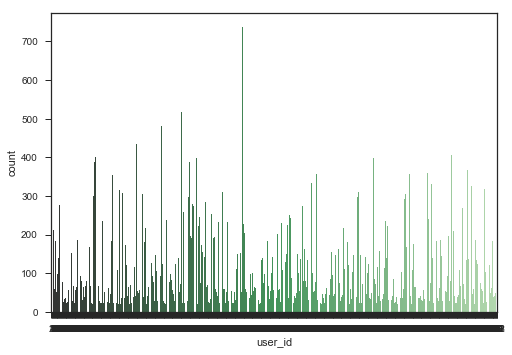

In [8]:
sns.set(style="ticks")
sns.countplot(x='user_id', data=df, palette="Greens_d");


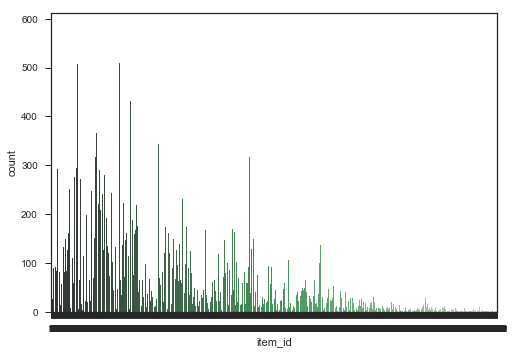

In [9]:
sns.countplot(x='item_id', data=df, palette="Greens_d");

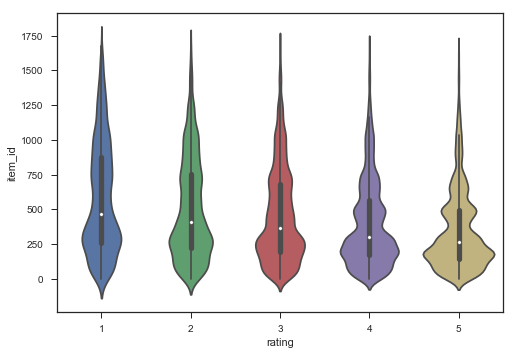

In [10]:
sns.set(style="ticks")

sns.violinplot(x=df.rating, y=df.item_id)


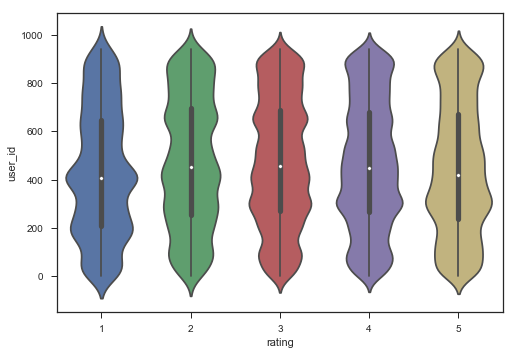

In [11]:
sns.violinplot(x=df.rating, y=df.user_id)

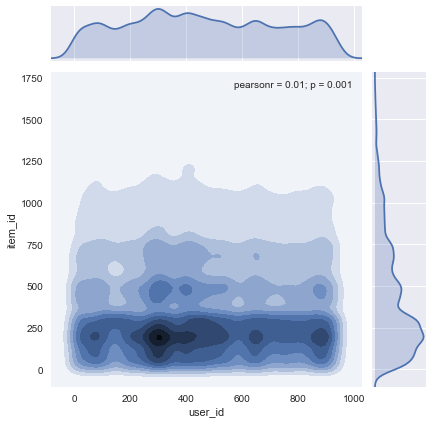

In [3]:
sns.jointplot(x = 'user_id', y = 'item_id', data = df, kind = 'kde', hue = 'rating')

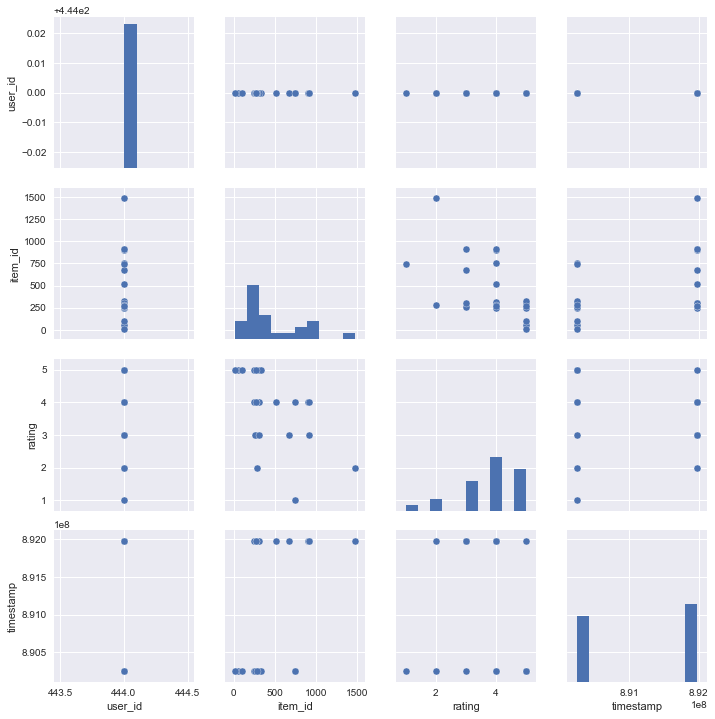

In [10]:
rand_user = df[df['user_id'] == 444]
sns.pairplot(rand_user)

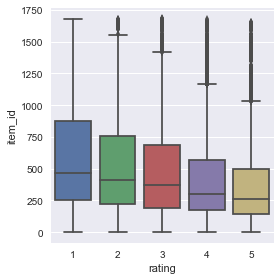

In [5]:
sns.factorplot(x='rating', y='item_id',
               data=df, kind="box")

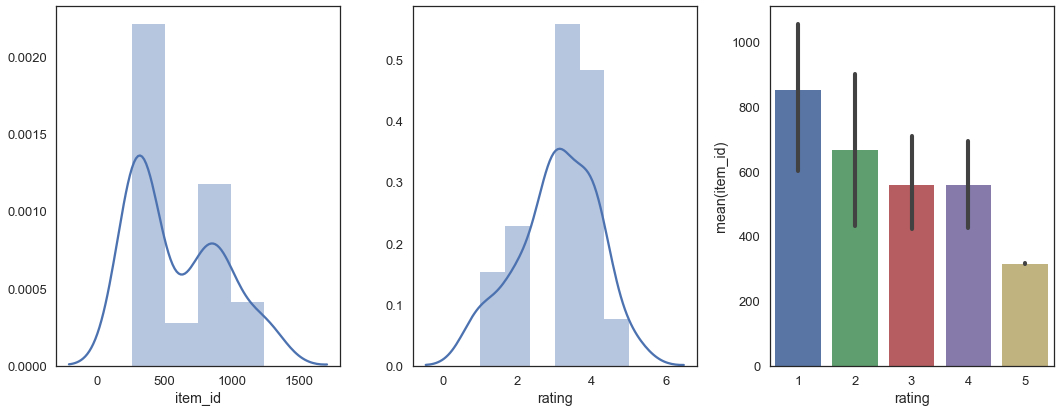

In [14]:
dfb = df[df['user_id'] == 100]

sns.set(style = 'white', context = 'talk')

#set up matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6), sharex = False)

#plot
sns.distplot(dfb.item_id, ax = ax1)
sns.distplot(dfb.rating, ax = ax2)
sns.barplot(dfb.rating, dfb.item_id, ax = ax3)

plt.tight_layout(h_pad=5)

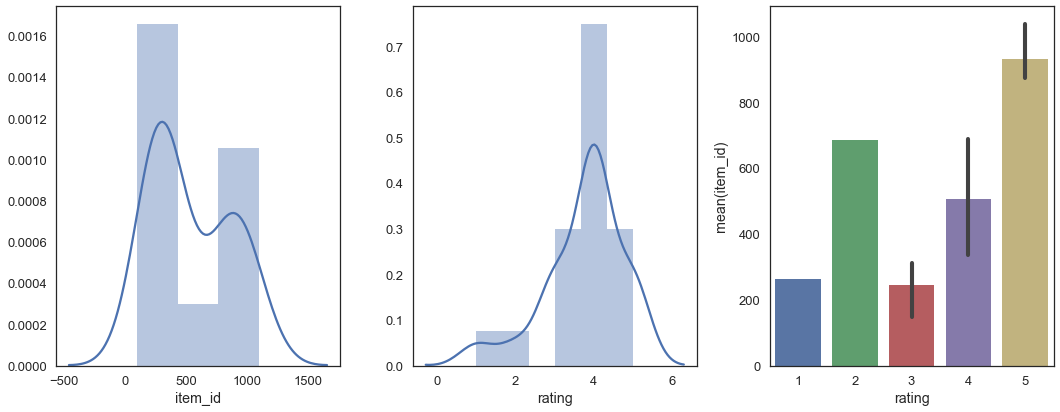

In [15]:
dfb = df[df['user_id'] == 300]

sns.set(style = 'white', context = 'talk')

#set up matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6), sharex = False)

#plot
sns.distplot(dfb.item_id, ax = ax1)
sns.distplot(dfb.rating, ax = ax2)
sns.barplot(dfb.rating, dfb.item_id, ax = ax3)

plt.tight_layout(h_pad=5)

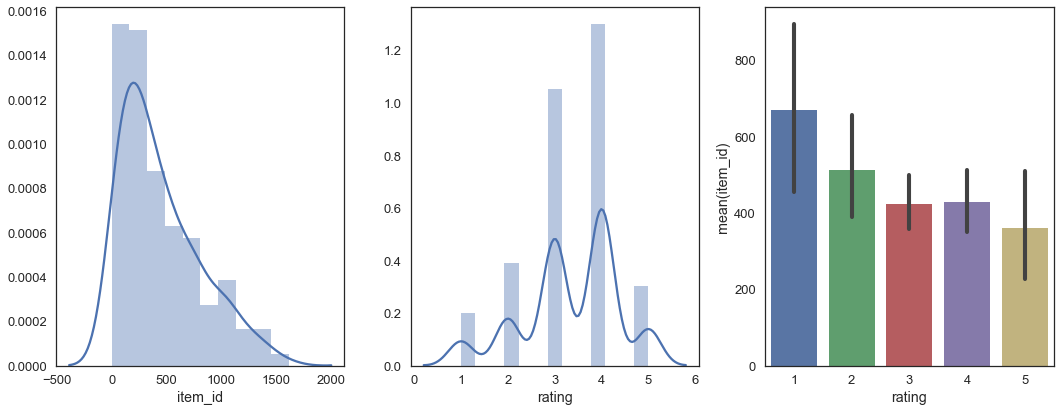

In [16]:
dfb = df[df['user_id'] == 500]

sns.set(style = 'white', context = 'talk')

#set up matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6), sharex = False)

#plot
sns.distplot(dfb.item_id, ax = ax1)
sns.distplot(dfb.rating, ax = ax2)
sns.barplot(dfb.rating, dfb.item_id, ax = ax3)

plt.tight_layout(h_pad=5)

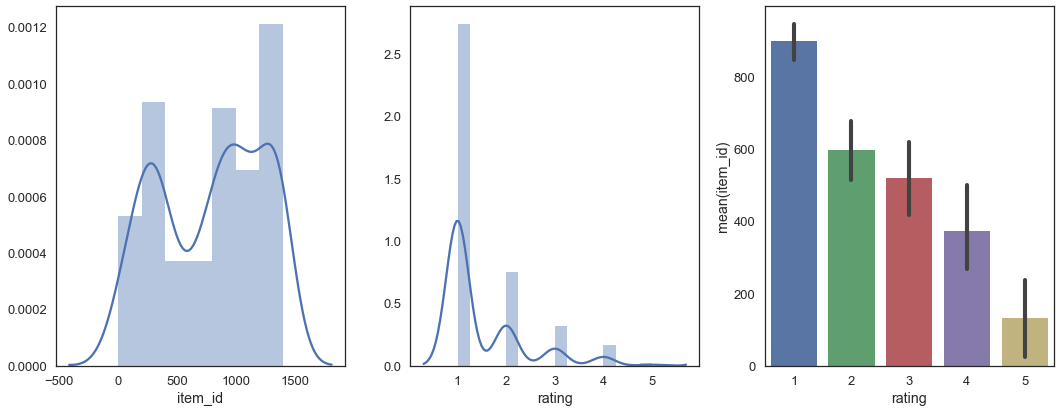

In [12]:
dfb = df[df['user_id'] == 181]

sns.set(style = 'white', context = 'talk')

#set up matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6), sharex = False)

#plot
sns.distplot(dfb.item_id, ax = ax1)
sns.distplot(dfb.rating, ax = ax2)
sns.barplot(dfb.rating, dfb.item_id, ax = ax3)

plt.tight_layout(h_pad=5)

In [10]:
user_avrate = pd.read_excel('user_avrate.xlsx')
item_avrate = pd.read_excel('item_avrate.xlsx')
user_avrate.head()

,user_id,av_rating
0,1,3.610294
1,2,3.709677
2,3,2.796296
3,4,4.333333
4,5,2.874286


In [44]:
from sklearn.cluster import KMeans

X = user_avrate
kmeans = KMeans(n_clusters=5, random_state=44).fit(user_avrate)

#kmeans.labels_

In [45]:
kmeans.cluster_centers_

array([[ 848.        ,    3.56973777],
       [ 280.        ,    3.64846589],
       [ 468.        ,    3.60636576],
       [ 657.5       ,    3.51112061],
       [  93.5       ,    3.60680179]])

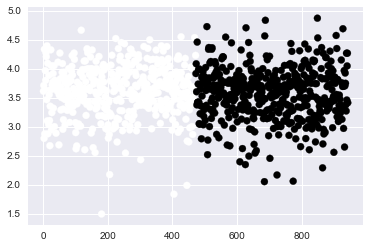

In [47]:
y_pred = KMeans(n_clusters=2, random_state=44).fit_predict(user_avrate)

plt.subplot()
figsize = (18, 15)
plt.scatter(user_avrate.user_id, user_avrate.av_rating, c=y_pred)